In [692]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.utils.data as Data

In [556]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
all_data = pd.concat([train,test], ignore_index = True)

In [557]:
# all_data.head()
train.info()
# train['Ticket'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Survival rate of women is higher than men

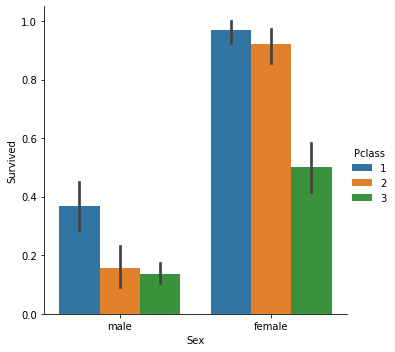

In [558]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind="bar", data=train)

# Age<12 child survival rate is higher

Text(12.359751157407416, 0.5, 'Survival density')

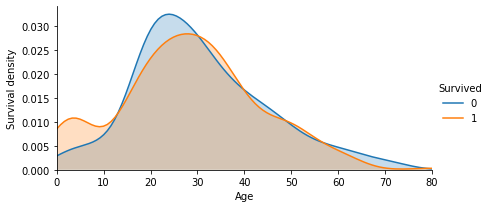

In [559]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=[0, train['Age'].max()])
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('Survival density')

# Embarked site C has more survival rate

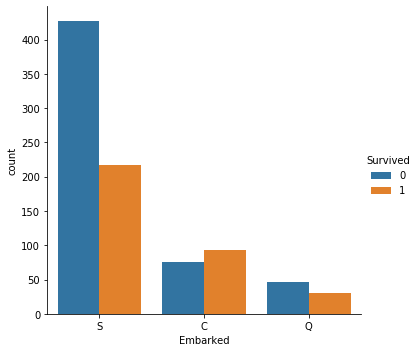

In [560]:
sns.catplot(x='Embarked',hue='Survived', kind='count', data=train)

# Name indicate the occupation, different career has different survival rates

{'Mlle', 'Master', 'Mme', 'Rev', 'Capt', 'Don', 'Sir', 'Mr', 'Dr', 'Major', 'the Countess', 'Jonkheer', 'Dona', 'Ms', 'Mrs', 'Lady', 'Miss', 'Col'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


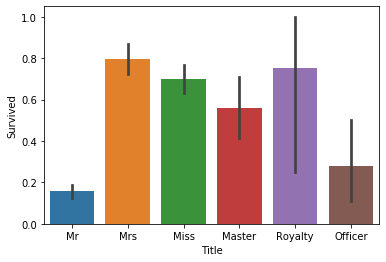

In [561]:
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(set(dict(all_data['Title']).values()))
all_data.info()
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data)

# Family size has an impact on survival rate

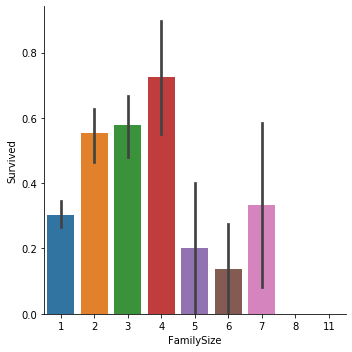

In [562]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.catplot(x='FamilySize', y='Survived', kind='bar', data=all_data)

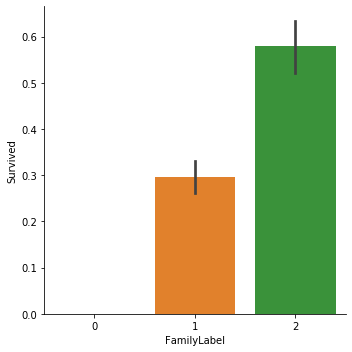

In [563]:
def famLabel(s):
    if s>=2 and s<=4:
        return 2
    elif ((s>4) and (s<=7)) or (s==1):
        return 1
    elif (s>7):
        return 0
    
all_data['FamilyLabel'] = all_data['FamilySize'].apply(famLabel)
sns.catplot(x='FamilyLabel', y='Survived', kind='bar', data=all_data)

# Different Cabin level has different survival rate

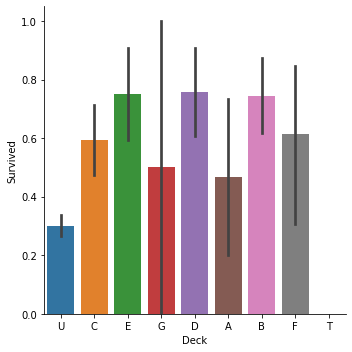

In [564]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck'] = all_data['Cabin'].str.get(0)
sns.catplot(x='Deck', y='Survived', kind='bar', data=all_data)

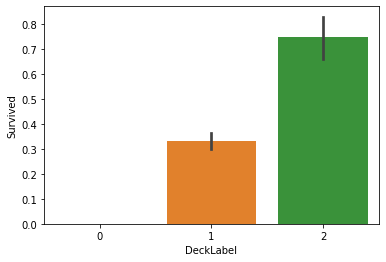

In [565]:
def deckLabel(s):
    if s=='E' or s=='D' or s=='B':
        return 2
    elif s=='U' or s=='C' or s=='G' or s=='A' or s=='F':
        return 1
    else:
        return 0

all_data['DeckLabel'] = all_data['Deck'].apply(deckLabel)
sns.barplot(x='DeckLabel', y='Survived', data=all_data)

# different Ticket has different survival rate

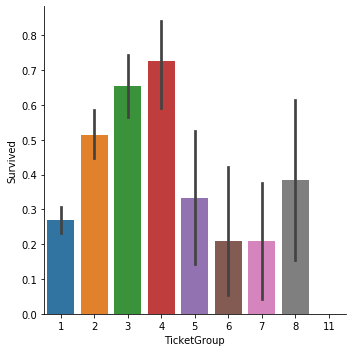

In [566]:
ticketCount = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x: ticketCount[x])
sns.catplot(x='TicketGroup', y='Survived', kind='bar', data=all_data)

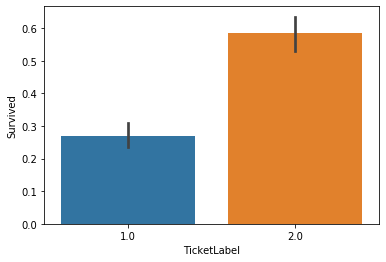

In [567]:
def ticLabel(s):
    if s>=2 and s<=4:
        return 2
    elif (s>4 and s<=8) or (s==1):
        return 1
    elif s>11:
        return 0
    
all_data['TicketLabel'] = all_data['TicketGroup'].apply(ticLabel)
sns.barplot(x='TicketLabel', y='Survived', data=all_data)

In [568]:
all_data.info()
all_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilySize   1309 non-null   int64  
 14  FamilyLabel  1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  DeckLabel    1309 non-null   int64  
 17  TicketGroup  1309 non-null   int64  
 18  TicketLabel  1298 non-null   float64
dtypes: flo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,DeckLabel,TicketGroup,TicketLabel
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,2,2,U,1,1,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,C,1,2,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,1,1,U,1,1,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,C,1,2,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,1,1,U,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,Unknown,S,Mr,1,1,U,1,1,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty,1,1,C,1,3,2.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,Mr,1,1,U,1,1,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,Unknown,S,Mr,1,1,U,1,1,1.0


# Fill missing Age data

In [569]:
# all_data.head()
age_df = all_data[['Age', 'Pclass', 'Sex', 'Title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges

# Fill missing Embarked Data

In [570]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,DeckLabel,TicketGroup,TicketLabel
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,1,B,2,2,2.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,1,B,2,2,2.0


In [571]:
all_data.groupby(by=["Pclass","Embarked","TicketLabel","DeckLabel"]).Fare.median()

Pclass  Embarked  TicketLabel  DeckLabel
1       C         1.0          1             30.69580
                               2            134.50000
                  2.0          1             83.15830
                               2             79.20000
        Q         2.0          1             90.00000
        S         1.0          0             35.50000
                               1             29.25000
                               2             26.55000
                  2.0          1             80.35415
                               2             66.08750
2       C         1.0          1             13.86250
                               2             13.82710
                  2.0          1             37.00420
        Q         1.0          1             12.35000
                               2             12.35000
        S         1.0          1             13.00000
                               2             13.00000
                  2.0          1         

In [572]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

# Fill missing Fare data

In [573]:
all_data[all_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,DeckLabel,TicketGroup,TicketLabel
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,Mr,1,1,U,1,1,1.0


In [574]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3) & (all_data['TicketLabel'] == 1.0)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

# Deal with some abnormal training data (women/child dead or men,adult live)

In [575]:
all_data['Surname'] = all_data['Name'].apply(lambda x: x.split(',')[0].strip())
surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:surname_Count[x])
Female_Child_Group = all_data.loc[(all_data['FamilyGroup'] >= 2 ) & ((all_data['Age'] <= 12) | (all_data['Sex'] == 'female'))]
Male_Adult_Group = all_data.loc[(all_data['FamilyGroup'] >= 2) & (all_data['Age'] > 12 ) & (all_data['Sex'] == 'male')]

In [576]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'Average Survived')

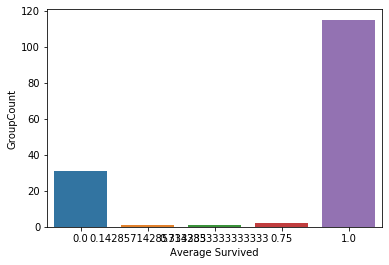

In [577]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"])
plt.xlabel('Average Survived')

In [578]:
MaleAdult = pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
MaleAdult.columns=['GroupCount']
MaleAdult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


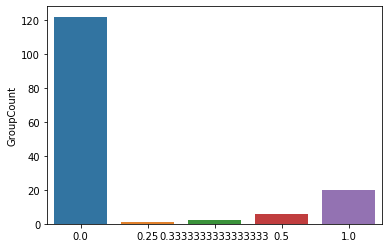

In [579]:
sns.barplot(x=MaleAdult.index, y=MaleAdult['GroupCount'])

In [580]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Johnston', 'Lahtinen', 'Panula', 'Zabour', 'Caram', 'Attalah', 'Bourke', 'Ilmakangas', 'Boulos', 'Vander Planke', 'Rosblom', 'Palsson', 'Barbara', 'Van Impe', 'Cacic', 'Lobb', 'Skoog', 'Sage', 'Goodwin', 'Lefebre', 'Robins', 'Arnold-Franchi', 'Rice', 'Ford', 'Strom', 'Danbom', 'Canavan', 'Olsson', 'Turpin', 'Jussila', 'Oreskovic'}
{'Jonsson', 'Dick', 'Bishop', 'Beane', 'Cardeza', 'Harder', 'Kimball', 'Goldenberg', 'Greenfield', 'Chambers', 'Taylor', 'Duff Gordon', 'Frauenthal', 'McCoy', 'Frolicher-Stehli', 'Nakid', 'Daly', 'Bradley', 'Beckwith', 'Jussila'}


In [581]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  FamilySize   1309 non-null   int64  
 14  FamilyLabel  1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  DeckLabel    1309 non-null   int64  
 17  TicketGroup  1309 non-null   int64  
 18  TicketLabel  1298 non-null   float64
 19  Surnam

/Users/gexueren/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Prepare for the training data

In [582]:
all_data=pd.concat([train, test])
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','DeckLabel','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.values[:,1:]
y = train.values[:,0]

# Set Models

In [583]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),SVC()]

# Normalization

In [584]:
scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)

# Train

In [711]:
# evaluate models by using cross-validation
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=10)
    print("{}:{},{}".format(name,score.mean(),score.std()))

KNN:0.8182022471910113,0.034249579674284596
LR:0.838414481897628,0.02918102970243238
NB:0.7846317103620474,0.044856359970244904
Tree:0.7845942571785268,0.047900791489313005
RF:0.8182397003745319,0.038499996310973256
GDBT:0.8361797752808989,0.041295153906293
SVM:0.8193008739076155,0.029506738984498192


# Use SVM and LR

In [712]:
model = LogisticRegression() # or you can replace it with SVC
model.fit(X_scaled,y)
score = cross_val_score(model, X_scaled, y, cv= 10)
print("{}:{},{}".format('LR',score.mean(),score.std()))

LR:0.838414481897628,0.02918102970243238


In [612]:
test_scaled_X=scaler.fit(test).transform(test)
predictions = model.predict(test_scaled_X).tolist()
predictions = map(int,predictions)

In [613]:
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions})
submission.to_csv(r"submission2.csv", index=False)

# Train with NN networks

In [703]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  
        self.fc = nn.Sequential(
            nn.Linear(17, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
        
    def forward(self, inputs):
        return self.fc(inputs)

In [704]:
myNet = Net()
print(myNet)

Net(
  (fc): Sequential(
    (0): Linear(in_features=17, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


# Train

In [705]:
# Train
optimzer = torch.optim.SGD(myNet.parameters(), lr=0.005, momentum=0.9)
loss_func = nn.BCELoss()

In [706]:
def train(model, loader, epoch_num, criterion, optimizer):
    losses = []
    accuracy_reocrd = []
    for epoch in range(epoch_num):
        running_loss = 0.0
        batches = 0
        accuracy = []
        for step, (batch_x, batch_y) in enumerate(loader):
            
            optimzer.zero_grad()
            out = model(batch_x)

            preds = (out > torch.Tensor([0.5])).squeeze()
            true_preds = (preds==batch_y.squeeze()).sum().item()
            accuracy.append(true_preds/preds.shape[0])
            
            loss = criterion(out, batch_y)
            loss.backward()

            optimizer.step()
            running_loss += loss.item()
            batches += 1
            
        losses.append(running_loss/batches) 
        aver_accuracy = np.mean(accuracy)
        accuracy_reocrd.append(aver_accuracy)
        if epoch % 1000 == 0:
            print('Epoch: {:2d} | Loss: {:.4f} | Accurancy: {:.4f}'.format(epoch, losses[-1], aver_accuracy))
    return losses, accuracy_reocrd
        
train_X=torch.Tensor(X_scaled)
exp_y = np.expand_dims(y, axis=1)
train_Y=torch.Tensor(exp_y)

torch_dataset = Data.TensorDataset(train_X, train_Y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=100,
    shuffle=True,
)

loss, accuracy = train(myNet, loader, 10000, loss_func, optimzer)

Epoch:  0 | Loss: 0.6763 | Accurancy: 0.6163
Epoch: 1000 | Loss: 0.3254 | Accurancy: 0.8607
Epoch: 2000 | Loss: 0.3213 | Accurancy: 0.8667
Epoch: 3000 | Loss: 0.3106 | Accurancy: 0.8708
Epoch: 4000 | Loss: 0.3114 | Accurancy: 0.8751
Epoch: 5000 | Loss: 0.3014 | Accurancy: 0.8798
Epoch: 6000 | Loss: 0.3060 | Accurancy: 0.8794
Epoch: 7000 | Loss: 0.2970 | Accurancy: 0.8792
Epoch: 8000 | Loss: 0.2967 | Accurancy: 0.8781
Epoch: 9000 | Loss: 0.2971 | Accurancy: 0.8817


In [707]:
def plot_loss_accuracy(loss, accuracy):
    fid = plt.figure(figsize=(20,5))

    Axes = plt.subplot(121, title="loss")
    Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
    plt.minorticks_on()
    Axes.set_facecolor((0,0,0,0.02))
    # draw the line
    loss_X = np.arange(0,len(loss))
    plt.plot(loss_X, loss, 'k-', linewidth=3, color = 'r', label='loss')
    plt.grid(True,which='major',linewidth=0.5)
    plt.grid(True,which='minor',linewidth=0.1)
    plt.xlabel("epoch number")
    plt.ylabel("loss")
    plt.legend(loc='best',fontsize='x-small')
    plt.savefig('./loss.jpg')

    Axes = plt.subplot(122, title="accuracy")
    Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
    plt.minorticks_on()
    Axes.set_facecolor((0,0,0,0.02))
    # draw the line
    accuracy_X = np.arange(0,len(accuracy))
    plt.plot(accuracy_X, accuracy, 'k-', linewidth=3, color = 'b', label='accuracy')
    plt.grid(True,which='major',linewidth=0.5)
    plt.grid(True,which='minor',linewidth=0.1)
    plt.xlabel("epoch number")
    plt.ylabel("accuracy")
    plt.legend(loc='best',fontsize='x-small')
    plt.savefig('./accuracy.jpg')

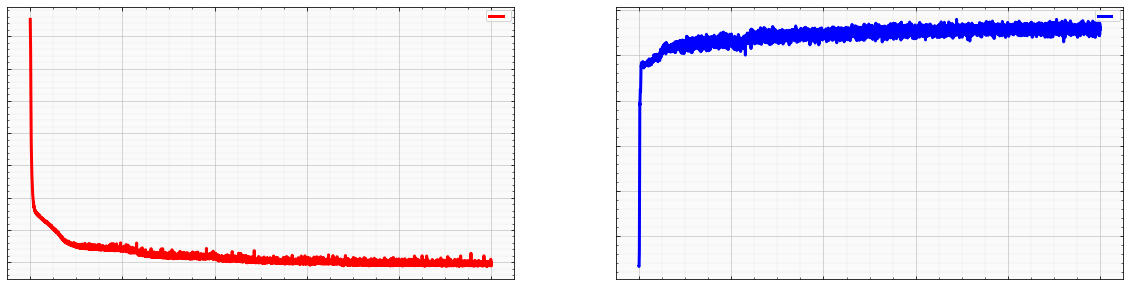

In [708]:
plot_loss_accuracy(loss, accuracy)

In [709]:
test_scaled_X=scaler.fit(test).transform(test)
test_X=torch.Tensor(test_scaled_X)
pred_y = myNet(test_X)
predictions = []
for i in pred_y:
    if i > torch.Tensor([0.5]):
        predictions.append(1)
    else:
        predictions.append(0)

In [710]:
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions})
submission.to_csv(r"submission4.csv", index=False)